In [14]:
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold as KFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RF
import xgboost as xgb
import os, pickle
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [15]:
def load_data():
    data_folder = "../tr_data/"
    dataX_temp = pickle.load(open(data_folder+"output/"+"dataX_final.pkl", "rb"))
    dataY_temp = pickle.load(open(data_folder+"output/"+"dataY_final.pkl", "rb"))
    dataY = []
      
    for data in dataY_temp:
        dataY.append(data)
#     for data in dataX_temp:
#         print(data)
#         np.append(dataX, data, axis = 0)
# #     print(dataX_temp)
# #     print(type(dataX))
    dataX = np.array(dataX_temp)
    return dataX, dataY

In [16]:
def normalize_arr(X):
    x_normed = X / X.max(axis=0)
    return x_normed

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=20, missing=None, n_estimators=10000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)
Accuracy: 70.00%
LR: 0.713743 (0.099694)
LDA: 0.675146 (0.112263)
KNN: 0.614327 (0.104925)
CART: 0.558187 (0.178518)
NB: 0.591813 (0.159002)
SVM: 0.713743 (0.099694)


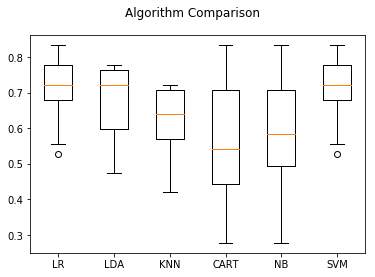

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X, Y = load_data()
    X = normalize_arr(X)
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


    # fit model no training data
    model = XGBClassifier(n_estimators = 10000, 
                                max_depth = 5,
                                min_child_weight = 20,
                                subsample = 0.75)
    model.fit(X_train, y_train);

    print(model)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # prepare configuration for cross validation test harness
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()